# Quantum Error Correction Project
## Philippe Noël, Alaisha Sharma, Nicolas Weninger
### File #2: 9-qubits code

In [1]:
import numpy as np
from qiskit import QuantumProgram
import Qconfig
from qiskit.tools.visualization import plot_histogram, plot_state

In [2]:
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config['url']) # set the APIToken and API url

/anaconda/lib/python3.6/site-packages/qiskit/_quantumprogram.py:707: DeprecationWarning: set_api() will be deprecated in upcoming versions (>0.5.0). Using the API object instead is recommended.
  "Using the API object instead is recommended.", DeprecationWarning)


#### Overview of the 9-qubit code
Source: https://pdfs.semanticscholar.org/f456/dfade192d442fce02e394fc01402adba7fc4.pdf

<img src="img/9_qubit_detailed.png">

### 1. Run the theoretical simulation with a local quantum simulator as a control experiment.

In [3]:
# define program
qp1 = QuantumProgram()
n = 9  # number of qubits
q = qp1.create_quantum_register("q", n) # quantum register
c = qp1.create_classical_register("c", n) # classical register

In [4]:
# create circuit
SimControl9 = qp1.create_circuit("SimControl9", [q], [c])

#### Create an arbitrary state $|\psi\rangle$

In [5]:
SimControl9.h(q[0])

#### The following cell encodes the arbitrary state $|\psi\rangle$ to 9 qubits as follows:

<img src="img/9_qubits_single_qubit_encoding_circuit.png">

In [6]:
# Encoding Stage
SimControl9.cx(q[0],q[3])
SimControl9.cx(q[0],q[6])

SimControl9.h(q[0])
SimControl9.h(q[3])
SimControl9.h(q[6])

SimControl9.cx(q[0],q[1])
SimControl9.cx(q[0],q[2])

SimControl9.cx(q[3],q[4])
SimControl9.cx(q[3],q[5])

SimControl9.cx(q[6],q[7])
SimControl9.cx(q[6],q[8])

<img src="img/9_qubits_total.jpg">

#### This cell performs X-error correction for the 9-qubit code using the ancilla qubits n+1 and n+2, where n is the first qubit in the block of three.

In [7]:
SimControl9.cx(q[0],q[1])
SimControl9.cx(q[0],q[2])
SimControl9.ccx(q[1],q[2],q[0])

SimControl9.cx(q[3],q[4])
SimControl9.cx(q[3],q[5])
SimControl9.ccx(q[4],q[5],q[3])

SimControl9.cx(q[6],q[7])
SimControl9.cx(q[6],q[8])
SimControl9.ccx(q[7],q[8],q[6])

#### This cell performs Z-error correction for the 9-qubit code using the same principle as in the 3-qubit scheme.

In [8]:
SimControl9.h(q[0])
SimControl9.h(q[3])
SimControl9.h(q[6])

SimControl9.cx(q[0],q[3])
SimControl9.cx(q[0],q[6])

SimControl9.ccx(q[3],q[6],q[0]) # correct

#### Measure logical qubit

In [9]:
SimControl9.measure(q[0], c[0])

#### Execute and plot the measurement results  
The shots paremeter allowed us to simulate the circuit quickly without taking too much time, as there are $2^{9}$ states to compute with.

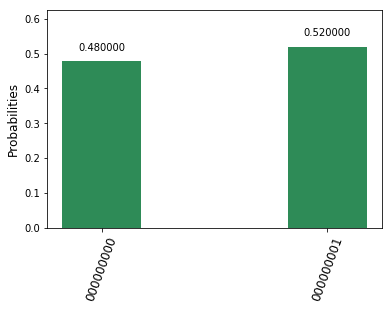

In [10]:
results = qp1.execute("SimControl9", shots = 50)
plot_histogram(results.get_counts("SimControl9"))

#### as $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$ this makes sense. There were no introduced errors. 

### 2. Run the theoretical simulation with a local quantum simulator with X and Z flips introduced to one qubit.

In [11]:
# define program
qp2 = QuantumProgram()
n = 9  # number of qubits
q = qp2.create_quantum_register("q", n) # quantum register
c = qp2.create_classical_register("c", n) # classical register

In [12]:
# create circuit
SimError9 = qp2.create_circuit("SimError9", [q], [c])

#### Create an arbitrary state $|\psi\rangle$

In [13]:
SimError9.h(q[0])

#### The following cell encodes the arbitrary state $|\psi\rangle$ to 9 qubits as follows, starting with the first two CNOTs:

<img src="img/9_qubits_single_qubit_encoding_circuit.png">

In [14]:
# First Encoding Stage
SimError9.cx(q[0],q[3])
SimError9.cx(q[0],q[6])

SimError9.h(q[0])
SimError9.h(q[3])
SimError9.h(q[6])

SimError9.cx(q[0],q[1])
SimError9.cx(q[0],q[2])

SimError9.cx(q[3],q[4])
SimError9.cx(q[3],q[5])

SimError9.cx(q[6],q[7])
SimError9.cx(q[6],q[8])

#### Introduce Z-flip and X-flip error to q0

In [15]:
SimError9.z(q[0])
SimError9.x(q[0])

<img src="img/9_qubits_total.jpg">

#### This cell performs X-error correction for the 9-qubit code using the ancilla qubits n+1 and n+2, where n is the first qubit in the block of three.

In [16]:
SimError9.cx(q[0],q[1])
SimError9.cx(q[0],q[2])
SimError9.ccx(q[1],q[2],q[0]) # correct

SimError9.cx(q[3],q[4])
SimError9.cx(q[3],q[5])
SimError9.ccx(q[4],q[5],q[3]) # correct

SimError9.cx(q[6],q[7])
SimError9.cx(q[6],q[8])
SimError9.ccx(q[7],q[8],q[6]) # correct


#### This cell performs Z-error correction for the 9-qubit code using the same principle as in the 3-qubit scheme.

In [17]:
SimError9.h(q[0])
SimError9.h(q[3])
SimError9.h(q[6])

SimError9.cx(q[0],q[3])
SimError9.cx(q[0],q[6])
SimError9.ccx(q[3],q[6],q[0]) # correct

#### Measure logical qubit

In [18]:
SimError9.measure(q[0], c[0])

#### Execute and plot the measurement results

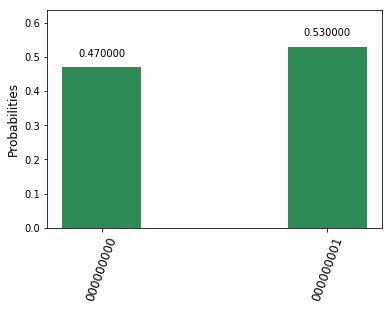

In [19]:
results2 = qp2.execute("SimError9", shots=100)
plot_histogram(results2.get_counts("SimError9"))

#### as $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$ this makes sense. There was an induced error that was corrected.

#### Neither was run on an IBMQ computer as the series of swaps that would have been required to map it to the 16-qubit unit would have been very complicated.

<img src="img/16_qubits_architecture.png">